In [1]:
import numpy as np
from scipy.signal import resample
from auditory_cortex.dataloader import DataLoader

from transformers import ClapModel, ClapProcessor

dataloader = DataLoader()

/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


Using default normalizer file...


In [2]:
model_name = "CLAP"
bin_width = 50
features = dataloader.get_raw_DNN_features(model_name=model_name)

# features = dataloader.get_resampled_DNN_features(model_name=model_name, bin_width=bin_width)

Reading raw features from /scratch/gilbreth/ahmedb/cache/CLAP/CLAP_raw_features.pkl


In [26]:
layer = 0
sent = 12
features[layer][sent].shape

torch.Size([4096, 128])

In [27]:
layer = 1
sent = 12
features[layer][sent].shape

torch.Size([4096, 128])

In [28]:
layer = 4
sent = 12
features[layer][sent].shape

torch.Size([256, 512])

In [25]:
layer = 7
sent = 12
features[layer][sent].shape

torch.Size([64, 1024])

In [5]:
aud = dataloader.get_stim_aud(sent)

In [6]:
dataloader.metadata.stim_duration(sent)

1.369625

In [11]:
model = ClapModel.from_pretrained("laion/larger_clap_general").to(0)
processor = ClapProcessor.from_pretrained("laion/larger_clap_general")

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [19]:
sent=12
aud = dataloader.get_stim_aud(sent)
aud = resample(aud, aud.size*3)
inputs = processor(audios=aud, sampling_rate=48000, return_tensors="pt").to(0)
# 

print(f"Sent duration: {dataloader.metadata.stim_duration(sent)} sec")
print(f"Input features: {inputs.input_features.shape} ")

Sent duration: 1.369625 sec
Input features: torch.Size([1, 1, 1001, 64]) 


In [20]:
sent=18
aud = dataloader.get_stim_aud(sent)
aud = resample(aud, aud.size*3)


inputs = processor(audios=aud, sampling_rate=48000, return_tensors="pt").to(0)
# 

print(f"Sent duration: {dataloader.metadata.stim_duration(sent)} sec")
print(f"Input features: {inputs.input_features.shape} ")

Sent duration: 1.7599999999999998 sec
Input features: torch.Size([1, 1, 1001, 64]) 


In [22]:
inputs.input_features.squeeze().shape

torch.Size([1001, 64])

(<matplotlib.image.AxesImage at 0x2acfdfc9e130>,
 <AxesSubplot:xlabel='time (ms)', ylabel='mel filters'>)

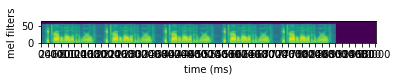

In [27]:
from auditory_cortex.utils import SyntheticInputUtils
import matplotlib.pylab as plt
%matplotlib inline
SyntheticInputUtils.plot_spect(inputs.input_features.cpu())

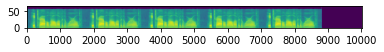

In [34]:
waveform = inputs.input_features.squeeze().cpu()
fig, ax = plt.subplots()
cmap='viridis'

x_ticks = np.arange(0, waveform.shape[0], 100)
data = ax.imshow(waveform.transpose(1,0), cmap=cmap, origin='lower')
ax.set_xticks(x_ticks, 10*x_ticks)
plt.show()

In [33]:
x_ticks*10

array([    0,   200,   400,   600,   800,  1000,  1200,  1400,  1600,
        1800,  2000,  2200,  2400,  2600,  2800,  3000,  3200,  3400,
        3600,  3800,  4000,  4200,  4400,  4600,  4800,  5000,  5200,
        5400,  5600,  5800,  6000,  6200,  6400,  6600,  6800,  7000,
        7200,  7400,  7600,  7800,  8000,  8200,  8400,  8600,  8800,
        9000,  9200,  9400,  9600,  9800, 10000])

In [ ]:
audio_embed = model.get_audio_features(**inputs)

In [12]:
inputs['input_features'].shape

torch.Size([1, 1, 1001, 64])

In [14]:
dict([*model.named_modules()])

{'': ClapModel(
   (text_model): ClapTextModel(
     (embeddings): ClapTextEmbeddings(
       (word_embeddings): Embedding(50265, 768, padding_idx=1)
       (position_embeddings): Embedding(514, 768, padding_idx=1)
       (token_type_embeddings): Embedding(1, 768)
       (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
     (encoder): ClapTextEncoder(
       (layer): ModuleList(
         (0-11): 12 x ClapTextLayer(
           (attention): ClapTextAttention(
             (self): ClapTextSelfAttention(
               (query): Linear(in_features=768, out_features=768, bias=True)
               (key): Linear(in_features=768, out_features=768, bias=True)
               (value): Linear(in_features=768, out_features=768, bias=True)
               (dropout): Dropout(p=0.1, inplace=False)
             )
             (output): ClapTextSelfOutput(
               (dense): Linear(in_features=768, out_features=768, bias=True)
 

In [15]:
dict([*model.named_modules()])['audio_model.audio_encoder.layers.0.blocks.1']

ClapAudioLayer(
  (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (attention): ClapAudioAttention(
    (self): ClapAudioSelfAttention(
      (query): Linear(in_features=128, out_features=128, bias=True)
      (key): Linear(in_features=128, out_features=128, bias=True)
      (value): Linear(in_features=128, out_features=128, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (output): ClapAudioSelfOutput(
      (dense): Linear(in_features=128, out_features=128, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
  )
  (drop_path): Identity()
  (layernorm_after): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (intermediate): ClapAudioIntermediate(
    (dense): Linear(in_features=128, out_features=512, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): ClapAudioOutput(
    (dense): Linear(in_features=512, out_features=128, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [ ]:
from datasets import load_dataset
from transformers import ClapModel, ClapProcessor

librispeech_dummy = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation")
audio_sample = librispeech_dummy[0]



inputs = processor(audios=audio_sample["audio"]["array"], return_tensors="pt").to(0)
audio_embed = model.get_audio_features(**inputs)


In [16]:
from auditory_cortex.computational_models.pretrained_models import CLAP

In [17]:
model = CLAP()

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [19]:
model_layers = model.get_model_layers()

In [22]:
k = next(iter(model_layers))
print(k)
model_layers[k]

audio_model.audio_encoder.layers.0.blocks.0


ClapAudioLayer(
  (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (attention): ClapAudioAttention(
    (self): ClapAudioSelfAttention(
      (query): Linear(in_features=128, out_features=128, bias=True)
      (key): Linear(in_features=128, out_features=128, bias=True)
      (value): Linear(in_features=128, out_features=128, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (output): ClapAudioSelfOutput(
      (dense): Linear(in_features=128, out_features=128, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
  )
  (drop_path): Identity()
  (layernorm_after): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (intermediate): ClapAudioIntermediate(
    (dense): Linear(in_features=128, out_features=512, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): ClapAudioOutput(
    (dense): Linear(in_features=512, out_features=128, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [4]:
from abc import ABC, abstractmethod, abstractproperty

class AbstractBaseClass(ABC):
    # @abstractmethod
    # def abstract_method(self):
    #     pass
    
    @abstractproperty
    def abstract_attribute(self):
        pass

class ConcreteClass(AbstractBaseClass):
    def __init__(self, value):
        self._abstract_attribute = value
    
    def abstract_method(self):
        print("This is an implementation of the abstract method.")
    
    @property
    def abstract_attribute(self):
        return self._abstract_attribute

    @abstract_attribute.setter
    def abstract_attribute(self, value):
        self._abstract_attribute = value

# Example usage
try:
    abstract_instance = AbstractBaseClass()
except TypeError as e:
    print(e)

concrete_instance = ConcreteClass("This is an abstract attribute")
print(concrete_instance.abstract_attribute)
concrete_instance.abstract_method()


Can't instantiate abstract class AbstractBaseClass with abstract methods abstract_attribute
This is an abstract attribute
This is an implementation of the abstract method.


In [ ]:
model.layer_names

['wav2vec2.feature_extractor.conv_layers.0.layer_norm',
 'wav2vec2.feature_extractor.conv_layers.1.activation',
 'wav2vec2.feature_extractor.conv_layers.2.activation',
 'wav2vec2.feature_extractor.conv_layers.3.activation',
 'wav2vec2.feature_extractor.conv_layers.4.activation',
 'wav2vec2.feature_extractor.conv_layers.5.activation',
 'wav2vec2.feature_projection.layer_norm',
 'wav2vec2.encoder.pos_conv_embed.activation',
 'wav2vec2.encoder.layer_norm',
 'wav2vec2.encoder.layers.0.final_layer_norm',
 'wav2vec2.encoder.layers.1.final_layer_norm',
 'wav2vec2.encoder.layers.2.final_layer_norm',
 'wav2vec2.encoder.layers.3.final_layer_norm',
 'wav2vec2.encoder.layers.4.final_layer_norm',
 'wav2vec2.encoder.layers.5.final_layer_norm',
 'wav2vec2.encoder.layers.6.final_layer_norm',
 'wav2vec2.encoder.layers.7.final_layer_norm',
 'wav2vec2.encoder.layers.8.final_layer_norm',
 'wav2vec2.encoder.layers.9.final_layer_norm',
 'wav2vec2.encoder.layers.10.final_layer_norm',
 'wav2vec2.encoder.layer